# Telecom churn prediction

Objective: In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

1. Data extraction & business understanding
2. EDA - missing data analysis, feature selection, 
3. Data preparation for model building
4. Model selection
5. Conclusion

In [1]:
### Load data ###
import time
import numpy as np
import pandas as pd
from IPython.display import display

import warnings
warnings.simplefilter("ignore")

### Visualization packages ###
import matplotlib.pyplot as pp
import seaborn as sns

### Model buillding 
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer as knn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, roc_auc_score,precision_recall_curve, average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


### Make a pipeline
from imblearn.pipeline import Pipeline

### Sampling technique
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel


# Set environment settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

### 1. Data extraction

In [2]:
### Load packages
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

### Load dictionary for EDA
dictionary=pd.read_csv('data_dictionary.csv')
dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [3]:
print(f'Train data')
print(f'Shape of data: {train_data.shape}')
print(f'Target rate: {100*train_data.churn_probability.mean():.2f}%')
print(f'{100*train_data[train_data.isnull().any(axis=1)].shape[0]/train_data.shape[0]:.2f}% of the data has missing values and needs to be handled \n')

print(f'Test data')
print(f'Shape of data: {test_data.shape}')
print(f'{100*test_data[test_data.isnull().any(axis=1)].shape[0]/test_data.shape[0]:.2f}% of the data has missing values and needs to be handled \n')


Train data
Shape of data: (69999, 172)
Target rate: 10.19%
85.31% of the data has missing values and needs to be handled 

Test data
Shape of data: (30000, 171)
85.31% of the data has missing values and needs to be handled 



In [4]:
print(f'Total number of attributes: {train_data.shape[1]}')
print(f"Number of numerical attributes in the dataset: {train_data.select_dtypes(['float64','int64']).shape[1]}")
print(f"Number of categorical attributes in the dataset: {train_data.select_dtypes(['object']).shape[1]}")
print(f"Attributes: {train_data.columns.tolist()}")

train_data.select_dtypes(['object']).info()

Total number of attributes: 172
Number of numerical attributes in the dataset: 163
Number of categorical attributes in the dataset: 9
Attributes: ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou

Target rate: 10.19%


array([62867,  7132], dtype=int64)

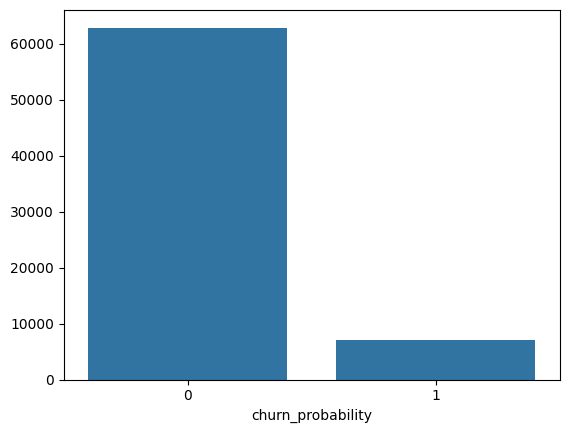

In [5]:
### Target proportion ###
print(f'Target rate: {100*train_data.churn_probability.mean():.2f}%')
sns.barplot(x=train_data.churn_probability.value_counts().index,y=train_data.churn_probability.value_counts().values)
train_data.churn_probability.value_counts().values

(69999, 163)

Target rate: 10.19%


(30000, 162)

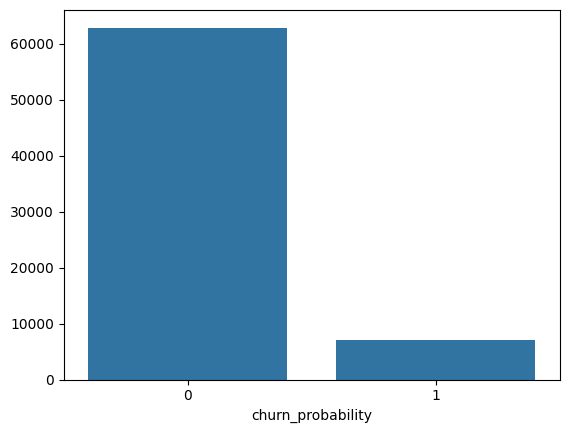

In [6]:
### removing invalid columns in train set
train_data=train_data.loc[:,~((train_data.isna()) | (train_data == 0)).all()]

display(train_data.shape)

print(f'Target rate: {100*train_data.churn_probability.mean():.2f}%')
sns.barplot(x=train_data.churn_probability.value_counts().index,y=train_data.churn_probability.value_counts().values)
train_data.churn_probability.value_counts().values

### removing invalid columns in test set
test_data=test_data.loc[:,~((test_data.isna()) | (test_data == 0)).all()]

display(test_data.shape)



### 2. Exploratory Data Analysis (EDA)
 -  Missing data analysis
 - Imputation 
 - Deriving features from potential 
 - Analysis with target variable and other predictors

count    69999.000000
mean        15.904381
std         10.713484
min          0.000000
25%         12.269939
50%         18.404908
75%         18.404908
max         71.165644
Name: missing_data_per_record_prct, dtype: float64

Number of records with no missing values


churn_probability
0    10062
1      222
Name: count, dtype: int64

,target_cnt,total_cus,missing_tgt_rate_at_thr,missing_thres
0,0,0,0.0,100
0,0,0,0.0,105
0,0,0,0.0,110
0,0,0,0.0,115
0,0,0,0.0,120
0,0,0,0.0,125
0,0,0,0.0,130
0,0,0,0.0,135
0,0,0,0.0,140
0,0,0,0.0,145


Text(0.5, 0, 'Missing data per record in percentage')

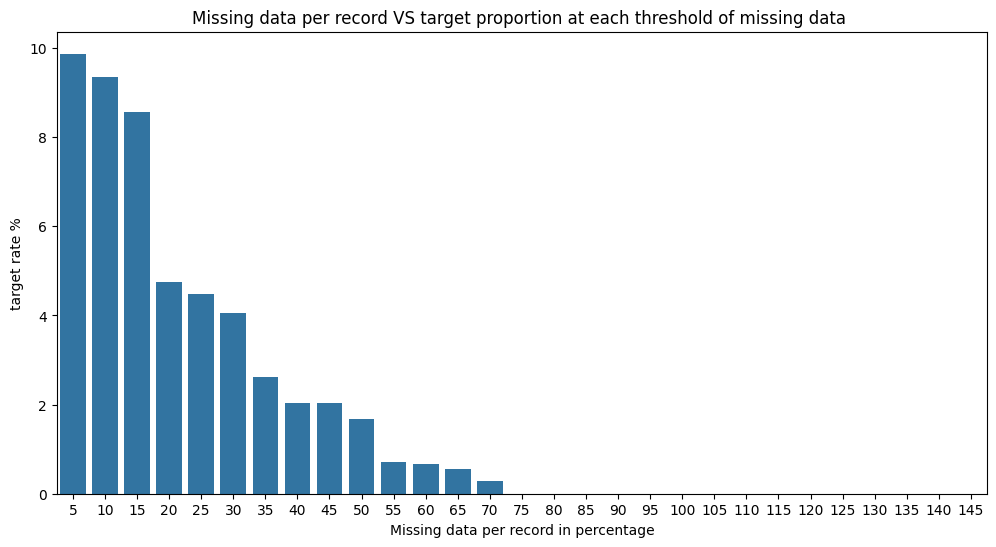

In [7]:
missing_df=train_data.copy()
missing_df['missing_data_per_record_prct']=100*(train_data.isnull().sum(axis=1)/train_data.shape[1])
display(missing_df.missing_data_per_record_prct.describe())
print(f'Number of records with no missing values')
display(missing_df.query(f"missing_data_per_record_prct==0").churn_probability.value_counts())

missing_prct_df=pd.DataFrame()

for i in np.arange(5,150,5):
    db=pd.DataFrame([{
                      'target_cnt':missing_df.query(f"missing_data_per_record_prct>={i}").churn_probability.sum(),
                      'total_cus':missing_df.query(f"missing_data_per_record_prct>={i}").churn_probability.count(),
                      'missing_tgt_rate_at_thr':100*(missing_df.query(f"missing_data_per_record_prct>={i}").churn_probability.sum()/missing_df.shape[0])
                      }]).assign(missing_thres=round(i,0))
    missing_prct_df=pd.concat([missing_prct_df,db])
# missing_prct_df.columns=['target_cnt',,'missing_thres']
display(missing_prct_df.tail(10))
fig,ax=pp.subplots(figsize=(12,6))
ax.set_title('Missing data per record VS target proportion at each threshold of missing data ')
sns.barplot(data=missing_prct_df,x='missing_thres',y='missing_tgt_rate_at_thr')
ax.set_ylabel('target rate %')
ax.set_xlabel('Missing data per record in percentage')

We can remove records with more than 50% of missing data. i.e 590 customers can dropped. Now, let's look at column-wise missing data to drop columns with more than 60% of the data

In [8]:
missing_df.drop(columns=['id','circle_id'],axis=0,inplace=True)

Number of columns in the data missing more than 40% of the data: 57


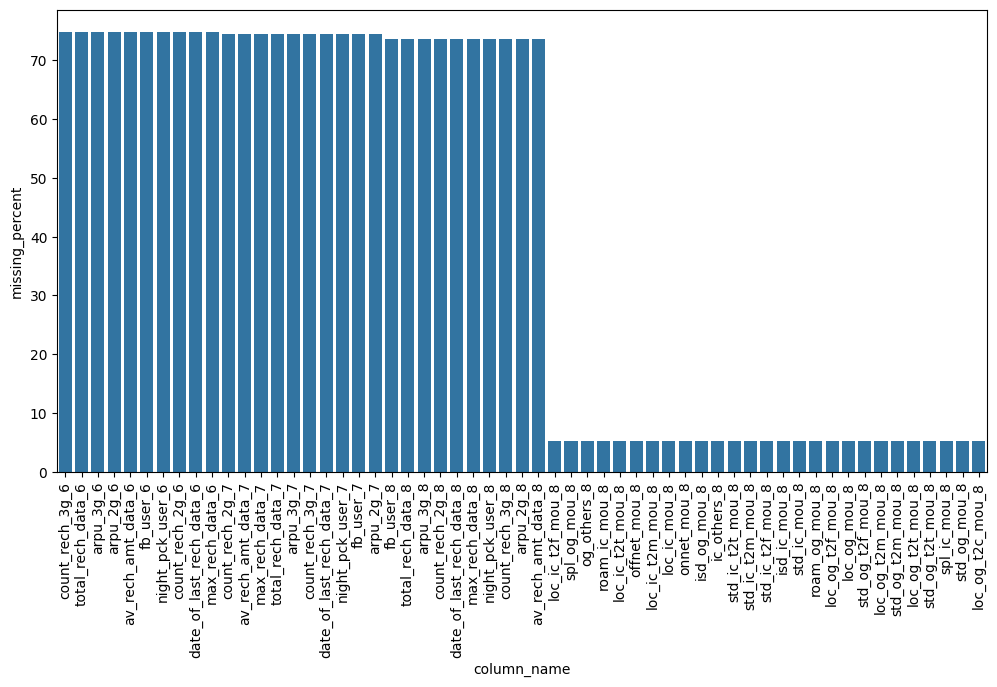

In [9]:
col_miss_df=(100*missing_df.isnull().sum(axis=0).sort_values(ascending=False)/missing_df.shape[0]).reset_index().rename(columns={'index':'column_name',0:'missing_percent'})
col_df=col_miss_df.query('missing_percent>=5')
print(f'Number of columns in the data missing more than 40% of the data: {col_df.shape[0]}')
fig,ax=pp.subplots(figsize=(12,6))
sns.barplot(data=col_df,x='column_name',y='missing_percent')
ax.set_xticklabels(col_df['column_name'],rotation=90)
pp.show()

### Imputation - KNN to impute the missing data or median imputation - Train and test data

In [10]:
%%time
knnimpute= knn(n_neighbors=3,weights='distance')

#### Train data 
train_numerical_data=train_data.select_dtypes(['int64','float64']).drop(columns=['id','circle_id'])
display(train_numerical_data.describe())


# ### fit & transform using KNN to impute
# data_imputed=knnimpute.fit_transform(numerical_data)
# train_data_imputed=pd.DataFrame(data_imputed,columns=numerical_data.columns)


# print(f'train data imputed')

#### Test data 
test_numerical_data=test_data.select_dtypes(['int64','float64']).drop(columns=['id','circle_id'])
display(test_numerical_data.describe())


# ### fit & transform using KNN to impute
# data_imputed=knnimpute.fit_transform(numerical_data)
# test_data_imputed=pd.DataFrame(data_imputed,columns=numerical_data.columns)


# print(f'test data imputed')



,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000

CPU times: total: 2.28 s
Wall time: 2.28 s


In [11]:
#### Median imputation ####
# %%time
def median_imputation(data=train_numerical_data):
    for col in data.columns.to_list():
        data[col]=data[col].fillna(data[col].median())
    display(data.describe().T.head())
    return data

In [12]:
imputed_train=median_imputation(train_numerical_data)
imputed_test=median_imputation(test_numerical_data)
imputed_train.shape

,count,mean,std,min,25%,50%,75%,max
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.581,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.714,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.095,192.234,369.9090,33543.624
onnet_mou_6,69999.0,129.236765,294.605405,0.000,8.060,34.110,113.1000,7376.710
onnet_mou_7,69999.0,129.993840,305.867956,0.000,7.260,32.280,108.9400,8157.780


,count,mean,std,min,25%,50%,75%,max
arpu_6,30000.0,282.644348,314.560212,-185.043,92.90750,198.2275,371.96925,10955.066
arpu_7,30000.0,279.355021,323.205370,-2014.045,87.50475,191.7750,365.25075,13224.119
arpu_8,30000.0,279.845167,326.437029,-146.859,84.18050,191.6905,367.80475,13505.996
onnet_mou_6,30000.0,126.893971,285.560898,0.000,7.98000,34.7600,111.51750,6944.360
onnet_mou_7,30000.0,129.218578,297.584633,0.000,7.33000,32.5500,108.84500,7411.010


(69999, 152)

### Deriving potential features - Categorical to numerical

The idea is to capture recharges done on monthly basis and consistent recharge details and its churn rates

In [13]:

### creating a variable ###

def derived_variables(data=train_data):
    categorical_data=data.select_dtypes('object')
    categorical_data['churn']=train_data.churn_probability
    display(categorical_data.shape)

    for i,last,rech_n,rech_data in zip((6,7,8),('last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'),('date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'), ('date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8')):
        col_1=f'rech_{i}_difference'
        col_2=f'rech_data_{i}_data_difference'
        col_4=f'rech_done_{i}'
        col_3=f'rech_data_done_{i}'
        #### Recharge time period ---> difference between last date of payment per and date in which the payment is made ####
        categorical_data[col_1]=(pd.to_datetime(categorical_data[last])-pd.to_datetime(categorical_data[rech_data])).dt.days
        categorical_data[col_2]=(pd.to_datetime(categorical_data[last])-pd.to_datetime(categorical_data[rech_n])).dt.days
        #### labelling the recharges being done or not --> 1 is recharge done and 0 is not recharged ####
        categorical_data[col_4]=np.where(categorical_data[col_1]>=0,1,0)
        categorical_data[col_3]=np.where(categorical_data[col_2]>=0,1,0)

    #### Recharges done on monthly basis --> 1 corresponds recharge done for that month and 0 corresponds no recharge done    
    categorical_data['num_mon_recharged_data']=categorical_data['rech_data_done_6']+categorical_data['rech_data_done_7']+categorical_data['rech_data_done_8']
    categorical_data['num_mon_recharged']=categorical_data['rech_done_6']+categorical_data['rech_done_7']+categorical_data['rech_done_8']
    categorical_data.shape
    return categorical_data

In [14]:
train_cat_df=derived_variables(train_data)
train_cat_to_num=train_cat_df[['num_mon_recharged_data','num_mon_recharged']]
display(train_cat_to_num.describe())
display(imputed_train.shape)
### combining numerical and categorical data
train_num_cat_preprocess_df=pd.concat([imputed_train,train_cat_to_num],axis=1)
train_num_cat_preprocess_df#.dropna(inplace=True)
# pd.concat([tr
# ain_data_imputed,cat_to_num],axis=1).shape
train_num_cat_preprocess_df


(69999, 10)

,num_mon_recharged_data,num_mon_recharged
count,69999.000000,69999.000000
mean,2.931485,0.769297
std,0.294754,1.129171
min,0.000000,0.000000
25%,3.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,3.000000


(69999, 152)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,num_mon_recharged_data,num_mon_recharged
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,1.0,2.0,1.0,145.0,145.0,145.0,1.0,1.0,1.0,0.0,0.0,0.0,154.0,154.0,154.0,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.42,0.84,11.30,8.80,9.09,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1958,0.00,0.00,0.00,0,3,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,1.0,1.0,1.0,145.0,145.0,145.0,1.0,0.0,1.0,0.0,1.0,0.0,154.0,145.0,154.0,0.00,352.91,0.00,0.00,3.96,0.00,0.52,122.07,0.84,11.30,122.08,9.09,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1.0,1.0,710,0.00,0.00,0.00,0,3,1
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.

In [15]:
test_cat_df=derived_variables(test_data)
test_cat_to_num=test_cat_df[['num_mon_recharged_data','num_mon_recharged']]
display(test_cat_df.describe())
display(imputed_test.shape)
### combining numerical and categorical data
test_num_cat_preprocess_df=pd.concat([imputed_test,test_cat_to_num],axis=1)
test_num_cat_preprocess_df#.dropna(inplace=True)
test_num_cat_preprocess_df


(30000, 10)

,churn,rech_6_difference,rech_data_6_data_difference,rech_done_6,rech_data_done_6,rech_7_difference,rech_data_7_data_difference,rech_done_7,rech_data_done_7,rech_8_difference,rech_data_8_data_difference,rech_done_8,rech_data_done_8,num_mon_recharged_data,num_mon_recharged
count,30000.000000,7585.000000,29494.000000,30000.000000,30000.000000,7706.000000,29467.000000,30000.000000,30000.000000,7922.000000,28839.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.103900,10.936190,5.939852,0.252833,0.983133,11.391773,5.595717,0.256867,0.982233,11.393461,5.542356,0.264067,0.961300,2.926667,0.773767
std,0.305136,8.561557,6.151445,0.434643,0.128774,8.870839,5.789430,0.436913,0.132104,8.862118,6.092093,0.440842,0.192882,0.308046,1.129555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,9.000000,3.000000,0.000000,1.000000,10.000000,4.000000,0.000000,1.000000,10.000000,4.000000,0.000000,1.000000,3.000000,0.000000
75%,0.000000,18.000000,10.000000,1.000000,1.000000,19.000000,8.000000,1.000000,1.000000,19.000000,7.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,29.000000,29.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,3.000000,3.000000


(30000, 151)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,num_mon_recharged_data,num_mon_recharged
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,48.93,7.68,28.48,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.00,0.00,5,5,4,103,90,60,50,30,30,30,30,0,1.0,1.0,1.0,145.0,145.0,145.0,1.0,1.0,1.0,0.0,0.0,0.0,154.0,154.0,154.0,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.415,0.985,9.96,8.865,9.60,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1692,0.00,0.00,0.00,3,0
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,1.0,1.0,1.0,145.0,145.0,145.0,1.0,1.0,1.0,0.0,0.0,0.0,154.0,154.0,154.0,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.415,0.985,9.96,8.865,9.60,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2533,0.00,0.00,0.00,3,0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00

<Axes: xlabel='num_mon_recharged_data', ylabel='churn_probability'>

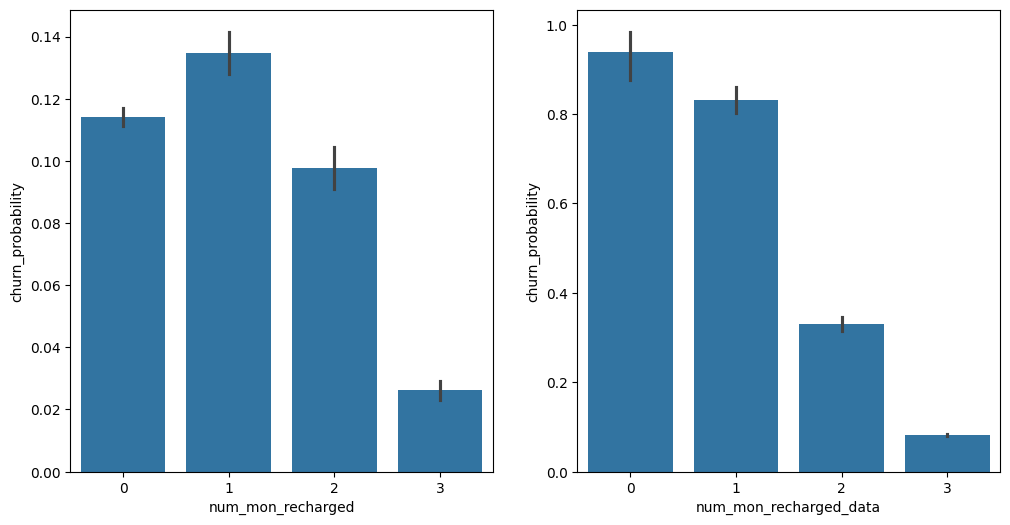

In [16]:
fig,axes=pp.subplots(1,2,figsize=(12,6))

sns.barplot(data=train_num_cat_preprocess_df,x='num_mon_recharged',y='churn_probability',ax=axes[0])
sns.barplot(data=train_num_cat_preprocess_df,x='num_mon_recharged_data',y='churn_probability',ax=axes[1])


Customers who does recharge the data pack are highly likely to churn compared to normal recharges

### Outlier detection - Only for train


In [17]:
iso_forest=IsolationForest(n_estimators=100,contamination=0.02,random_state=45)

out_data=train_num_cat_preprocess_df.select_dtypes(exclude='object')
display(out_data.shape)

train_num_cat_preprocess_df['outlier_score']=iso_forest.fit_predict(out_data)
    
    
                      
display(train_num_cat_preprocess_df['outlier_score'].value_counts())


train_num_cat_preprocess_df=train_num_cat_preprocess_df.query('outlier_score==1')
train_num_cat_preprocess_df.drop(columns='outlier_score',inplace=True)

train_num_cat_preprocess_df.shape

(69999, 154)

outlier_score
 1    68599
-1     1400
Name: count, dtype: int64

(68599, 154)

### Data pre-processing before feature selection

In [18]:
def std_data(data=train_data):
    
    """
    data: Input the data that needs to be standardized, for train data drop the target_variable: churn_probability
    """
    
    standardize=StandardScaler()
    
    processed_data=standardize.fit_transform(data)
    processed_data=pd.DataFrame(processed_data,columns=data.columns)
    
    return processed_data

In [19]:
final_train_df=std_data(data=train_num_cat_preprocess_df.drop(columns='churn_probability',axis=1))
final_test_df=std_data(data=test_num_cat_preprocess_df)


display(final_train_df.shape)
display(final_test_df.shape)


(68599, 153)

(30000, 153)

### Feature selection - PCA & RFE

In [20]:
### define PCA
def pca_feature_selection(data=final_train_df,pca= PCA(),explained_thres=.85):
    
    """
    data: Standardized data for dimnesionality reduction
    pca:  Intialize with necessary hyperparams
    explained_thres: Information explained by the principal component
    """
    

    ### Fitting PCA
    value_comps=pca.fit_transform(data)
    
    
    #### cummulative explained variance ratio ####
    n_comp=len(pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum()<=explained_thres])
    print(f'Selecting {n_comp}/{pca.n_components_} explaining {explained_thres} variance of the data')
    
    ### final_components for model fitting
    final_comp=value_comps[:,:n_comp]
    
    return final_comp, pca.explained_variance_ratio_, n_comp,explained_thres


Selecting 60/153 explaining 0.9 variance of the data


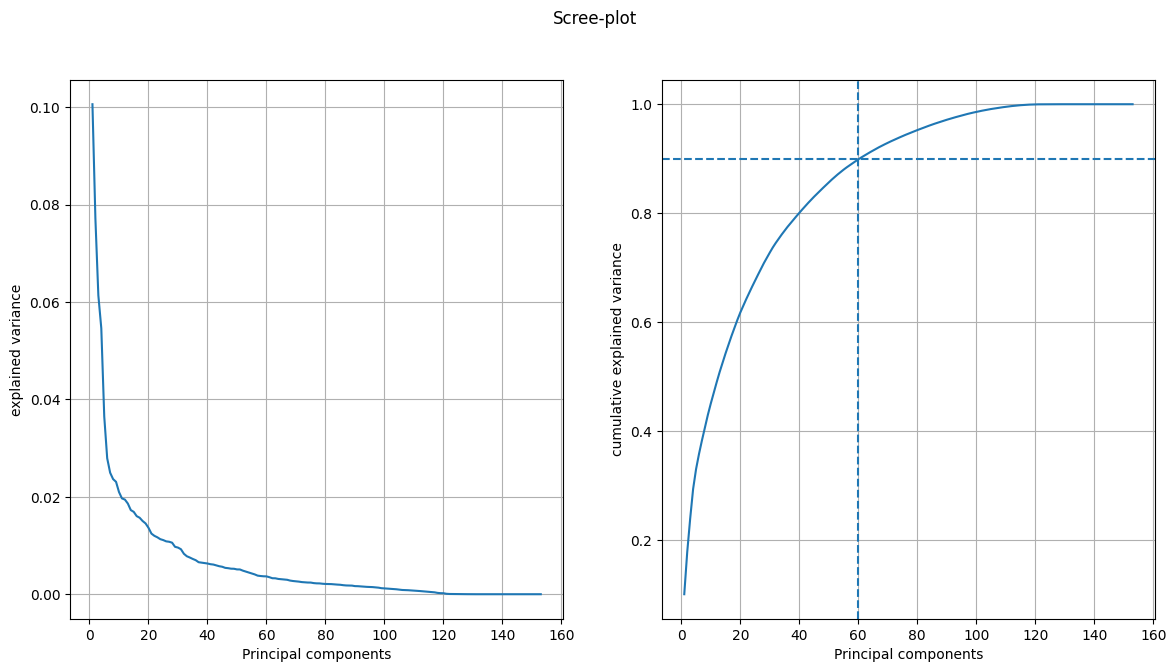

In [21]:
pcas,variance,components,thres=pca_feature_selection(data=final_train_df,explained_thres=.9)

#### Scree plot
fig, ax=pp.subplots(1,2,figsize=(14,7))

fig.suptitle('Scree-plot')
ax[0].plot(range(1,len(variance)+1),variance)
ax[0].set_xlabel('Principal components')
ax[0].set_ylabel('explained variance')
ax[0].grid()

ax[1].plot(range(1,len(variance)+1),variance.cumsum())
ax[1].set_xlabel('Principal components')
ax[1].axhline(y=thres,linestyle='--')
ax[1].axvline(x=components,linestyle='--')
ax[1].set_ylabel('cumulative explained variance')
ax[1].grid()


The PCAs are not explaining the variance properly. hence, let's look at correlations between variables to remove them before hand and re-run the entire PCA process

In [22]:
### Removing highly correlated variables 
#### correlation matrix ####
correlation_matrix = train_num_cat_preprocess_df.corr()

threshold=0.85

### filtering condition ###
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Extract highly correlated pairs
high_corr_pairs = upper_triangle[abs(upper_triangle) > threshold]

final_cols_removal=[]

# Print correlated pairs
for col in high_corr_pairs.columns:
    for index in high_corr_pairs.index:
        if not np.isnan(high_corr_pairs.loc[index, col]):
            print(f"{index} and {col} have high correlation: {high_corr_pairs.loc[index, col]:.2f}")
            final_cols_removal.append(index)
                       
final_cols_removal

onnet_mou_6 and std_og_t2t_mou_6 have high correlation: 0.87
onnet_mou_7 and std_og_t2t_mou_7 have high correlation: 0.88
onnet_mou_8 and std_og_t2t_mou_8 have high correlation: 0.89
offnet_mou_7 and std_og_t2m_mou_7 have high correlation: 0.86
offnet_mou_8 and std_og_t2m_mou_8 have high correlation: 0.86
std_og_mou_6 and total_og_mou_6 have high correlation: 0.85
std_og_mou_7 and total_og_mou_7 have high correlation: 0.86
std_og_mou_8 and total_og_mou_8 have high correlation: 0.87
std_ic_t2m_mou_6 and std_ic_mou_6 have high correlation: 0.87
std_ic_t2m_mou_7 and std_ic_mou_7 have high correlation: 0.89
std_ic_t2m_mou_8 and std_ic_mou_8 have high correlation: 0.88
loc_ic_mou_6 and total_ic_mou_6 have high correlation: 0.91
loc_ic_mou_7 and total_ic_mou_7 have high correlation: 0.90
loc_ic_mou_8 and total_ic_mou_8 have high correlation: 0.90
arpu_6 and total_rech_amt_6 have high correlation: 0.94
arpu_7 and total_rech_amt_7 have high correlation: 0.94
arpu_8 and total_rech_amt_8 have hi

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'total_rech_data_6',
 'count_rech_2g_6',
 'total_rech_data_7',
 'count_rech_2g_7',
 'total_rech_data_8',
 'count_rech_2g_8',
 'arpu_2g_6']

In [23]:
include_only=list(set(train_num_cat_preprocess_df.columns.tolist())-set(final_cols_removal))
print(f'Removed: {len(final_cols_removal)}')
print(f'Included: {len(include_only)}')

Removed: 30
Included: 127


(68599, 127)

Selecting 61/126 explaining 0.9 variance of the data


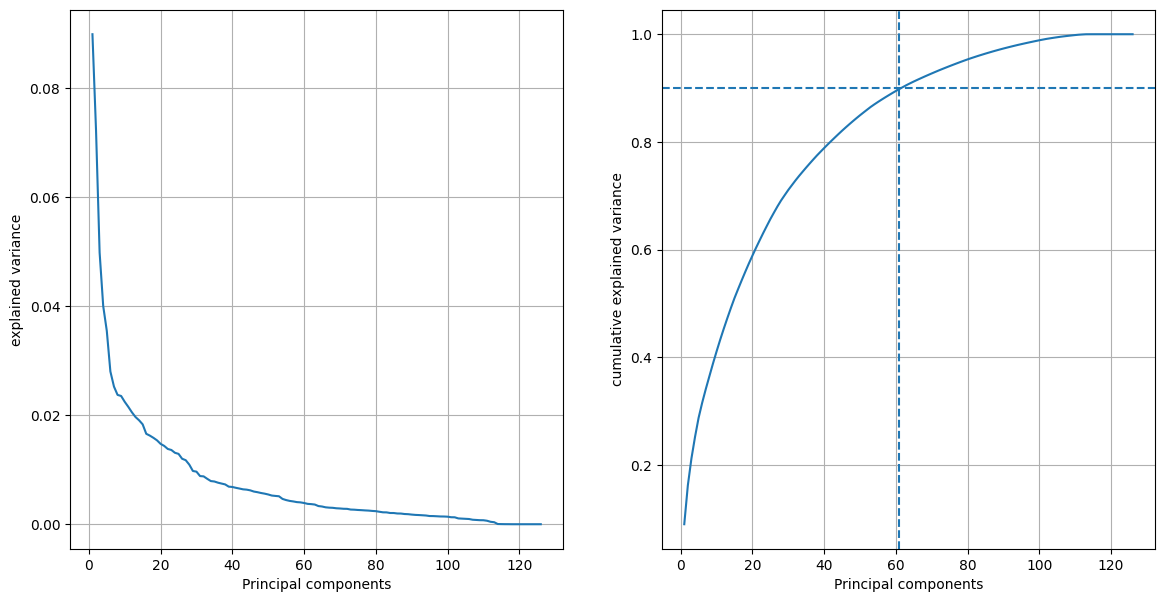

In [24]:
##### PCA after removal of columns ####
cols_am_df=train_num_cat_preprocess_df[include_only]
cols_am_df_std=std_data(cols_am_df)
display(cols_am_df_std.shape)


### fitting PCA
after_pcas,after_variance,after_components,after_thres=pca_feature_selection(data=cols_am_df_std.drop('churn_probability',axis=1),pca=PCA(random_state=42),explained_thres=.9)


#### Scree plot
fig, ax=pp.subplots(1,2,figsize=(14,7))

ax[0].plot(range(1,len(after_variance)+1),after_variance)
ax[0].set_xlabel('Principal components')
ax[0].set_ylabel('explained variance')
ax[0].grid()

ax[1].plot(range(1,len(after_variance)+1),after_variance.cumsum())
ax[1].set_xlabel('Principal components')
ax[1].axhline(y=after_thres,linestyle='--')
ax[1].axvline(x=after_components,linestyle='--')
ax[1].set_ylabel('cumulative explained variance')
ax[1].grid()



### Model Building pre-processing: Train & eval split for model building 

In [25]:
X_train,X_eval,Y_train,Y_eval=train_test_split(final_train_df,train_num_cat_preprocess_df['churn_probability'],test_size=0.3,random_state=42)

print(f'Train set: features - {X_train.shape} & {Y_train.shape} & Target rate: {100*Y_train.mean():.2f}% ')
print(f'Evaluation set: features - {X_eval.shape} & Target rate: {100*Y_eval.mean():.2f}% ')

Train set: features - (48019, 153) & (48019,) & Target rate: 10.22% 
Evaluation set: features - (20580, 153) & Target rate: 10.51% 


### Address imbalanced class !!! - Oversampling Technique

In [47]:
# Count class distribution -- fetching the majority and minority classes

def oversampling_minority(X_train=None,Y_train=None,sample_ratio=0.5):
    
    # Ensure Y_train has the same index as X_train
    Y_train = Y_train.reset_index(drop=True)
    X_train = X_train.reset_index(drop=True)
    
    ### step 1:fectching distribution ###
    class_counts = Y_train.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    # Step 2: Filter minority class samples
    X_minority = X_train[Y_train == minority_class]
    Y_minority = Y_train[Y_train == minority_class]

    # Step 3: Randomly duplicate minority samples until they match the majority count
    num_samples_to_add = round(sample_ratio*(class_counts.max() - class_counts.min()),0).astype('int')
    print(num_samples_to_add)
    X_oversampled = X_minority.sample(n=num_samples_to_add, replace=True, random_state=42)
    Y_oversampled = Y_minority.sample(n=num_samples_to_add, replace=True, random_state=42)

    # Step 4: Concatenate the oversampled data with original data
    X_train_resampled = pd.concat([X_train, X_oversampled], ignore_index=True)
    Y_train_resampled = pd.concat([Y_train, Y_oversampled], ignore_index=True)

    # Print class distribution after oversampling
    print("Before oversampling:\n", Y_train.value_counts(), "target_rate:",round(100*Y_train.mean(),2),"%")
    print("\nAfter oversampling:\n", Y_train_resampled.value_counts(),"target_rate:",round(100*Y_train_resampled.mean(),2),"%")    
    return X_train_resampled,Y_train_resampled
X_train_resampled,Y_train_resampled=oversampling_minority(X_train=X_train,Y_train=Y_train)

19100
Before oversampling:
 churn_probability
0    43110
1     4909
Name: count, dtype: int64 target_rate: 10.22 %

After oversampling:
 churn_probability
0    43110
1    24009
Name: count, dtype: int64 target_rate: 35.77 %


### Model Building 

- Logistic Regression
- SVM Classifier
- Decision Tree
- Random Forest
- XGBoost

In [27]:
def create_pipeline(model, param_grid, n_features=25, apply_pca=None):
    """
    Creates a pipeline with SMOTE, RFE, PCA (optional), and a given model.

    Parameters:
    - model: The machine learning model (e.g., RandomForestClassifier()).
    - param_grid: Hyperparameter grid for GridSearchCV.
    - n_features: Number of features for RFE (default: 25).
    - apply_pca: Whether to apply PCA ('Yes' or None).

    Returns:
    - A pipeline wrapped with GridSearchCV.
    """
    
    # Define steps in pipeline
    
    if apply_pca == None:
        steps = [
        ("oversampling", SMOTE(random_state=42)),  # Handle class imbalance
        ("rfe", RFE(estimator=model, n_features_to_select=n_features)),  # Feature selection
        ("model", model)
    ]
    else:
        steps = [
        ("pca", PCA(n_components=n_features, random_state=42)),
        ("oversampling", SMOTE(random_state=42)),  # Handle class imbalance
        ("model", model)
         ]

    # Create pipeline
    pipeline = Pipeline(steps)
    
    # Use GridSearchCV for hyperparameter tuning
    from joblib import parallel_backend
    with parallel_backend('threading'):
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    
    return grid_search

In [28]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP=np.sum((y_pred==1) & (y_true==1))
    TN=np.sum((y_pred==0) & (y_true==0))
    FP=np.sum((y_pred==1) & (y_true==0))
    FN=np.sum((y_pred==0) & (y_true==1))

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    recall = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = recall
    
    # F1-score
    f1_score=2*(recall*precision)/(recall+precision)

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Recall', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate','F1_score'],
        'Value': [accuracy, recall, specificity, precision, false_positive_rate, true_positive_rate,f1_score]
    })

    return metrics_df

In [29]:
models = {
    "Logistic Regression": (
        LogisticRegression(),
        {"model__C": [0.01, 0.1, 1, 10], "model__solver": ["lbfgs", "liblinear"]}
    ),
    
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"model__max_depth": [3, 5, 10, None], "model__min_samples_split": [2, 5, 10]}
    ),

    "Random Forest": (
        RandomForestClassifier(),
        {"model__n_estimators": [50, 100, 200], "model__max_depth": [3, 5, 10, None]}
    ),

    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.01, 0.1, 0.2]}
    ),

    "Support Vector Machine": (
        SVC(probability=True),
        {"model__C": [0.1, 1, 10], "model__kernel": ["linear"]}
    ),

    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.01, 0.1, 0.2]}
    )

}

In [38]:
Y_train[:200:].mean()

0.125

In [44]:
%%time

store_model_mets=pd.DataFrame()
store_best_estimator = pd.DataFrame()

for model_name, (model, param_grid) in models.items():
    print(f"\n🔹 Training {model_name}...")
    
    pipeline = create_pipeline(model, param_grid,n_features=25,apply_pca=None)
    pipeline.fit(X_train[:200:], Y_train[:200:])
    
    best_pipeline = pipeline.best_estimator_
    
    
    # Get SMOTE step and apply it to X_train_pca
    smote_step = best_pipeline.named_steps["oversampling"]  # Adjust step name if needed
    X_train_resampled, Y_train_resampled = smote_step.fit_resample(X_train, Y_train)
    display(X_train_resampled.shape)
    
    # Get RFE step and apply it to X_train
    rfe_step = best_pipeline.named_steps["rfe"]  # Adjust step name if needed
    X_train_rfe= rfe_step.transform(X_train_resampled)
    display(X_train_rfe.shape)


    # Now train the model on resampled data
    model = best_pipeline.named_steps["model"]
    # model.fit(X_train_rfe, Y_train_resampled)
    

    # Predict on train and test data
    # Y_pred_train = model.predict(X_train_rfe)
    Y_pred_train = pipeline.predict(X_train[:200:])

        
    Y_pred = pipeline.predict(X_eval)

    
    # Evaluate performance
    print(f"Best Params for {model_name}: {pipeline.best_params_}")
    print(f"Best model for {model_name}: {pipeline.best_estimator_}")
    model_params=pd.DataFrame({'best_params':pipeline.best_params_,'best_model':pipeline.best_estimator_}).assign(model_name=model_name)
    store_best_estimator=pd.concat([model_params,store_best_estimator])
    
    
    print("\nClassification Report-train:")
    print(calculate_classification_metrics(Y_train[:200:], Y_pred_train))
    print("\nClassification Report-test:")
    print(calculate_classification_metrics(Y_eval, Y_pred))
    
    train_met=calculate_classification_metrics(Y_train[:200:], Y_pred_train).assign(model_name=model_name,data='train')
    eval_met=calculate_classification_metrics(Y_eval, Y_pred).assign(model_name=model_name,data='evaluation')
    store_model_mets=pd.concat([store_model_mets,train_met,eval_met])
display(store_best_estimator)
display(store_model_mets)


🔹 Training Logistic Regression...


(86220, 153)

(86220, 25)

Best Params for Logistic Regression: {'model__C': 1, 'model__solver': 'lbfgs'}
Best model for Logistic Regression: Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=25)),
                ('model', LogisticRegression(C=1))])

Classification Report-train:
Confusion Matrix

[[165  10]
 [  0  25]]
                Metric     Value
0             Accuracy  0.950000
1               Recall  1.000000
2          Specificity  0.942900
3            Precision  0.714300
4  False Positive Rate  0.057100
5   True Positive Rate  1.000000
6             F1_score  0.833343

Classification Report-test:
Confusion Matrix

[[16036  2382]
 [  858  1304]]
                Metric     Value
0             Accuracy  0.842600
1               Recall  0.603100
2          Specificity  0.870700
3            Precision  0.353800
4  False Positive Rate  0.129300
5   True Positive Rate  0.603100
6             F1_score  0.

(86220, 153)

(86220, 25)

Best Params for Decision Tree: {'model__max_depth': None, 'model__min_samples_split': 10}
Best model for Decision Tree: Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=25)),
                ('model', DecisionTreeClassifier(min_samples_split=10))])

Classification Report-train:
Confusion Matrix

[[175   0]
 [  3  22]]
                Metric    Value
0             Accuracy  0.98500
1               Recall  0.88000
2          Specificity  1.00000
3            Precision  1.00000
4  False Positive Rate  0.00000
5   True Positive Rate  0.88000
6             F1_score  0.93617

Classification Report-test:
Confusion Matrix

[[16259  2159]
 [ 1113  1049]]
                Metric     Value
0             Accuracy  0.841000
1               Recall  0.485200
2          Specificity  0.882800
3            Precision  0.327000
4  False Positive Rate  0.117200
5   True Positiv

(86220, 153)

(86220, 25)

Best Params for Random Forest: {'model__max_depth': 10, 'model__n_estimators': 50}
Best model for Random Forest: Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=25)),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])

Classification Report-train:
Confusion Matrix

[[175   0]
 [  0  25]]
                Metric  Value
0             Accuracy    1.0
1               Recall    1.0
2          Specificity    1.0
3            Precision    1.0
4  False Positive Rate    0.0
5   True Positive Rate    1.0
6             F1_score    1.0

Classification Report-test:
Confusion Matrix

[[17209  1209]
 [ 1005  1157]]
                Metric     Value
0             Accuracy  0.892400
1               Recall  0.535200
2          Specificity  0.934400
3            Precision  0.489000
4  False Positive Rate  0.065600
5   True Posi

(86220, 153)

(86220, 25)

Best Params for Gradient Boosting: {'model__learning_rate': 0.1, 'model__n_estimators': 50}
Best model for Gradient Boosting: Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=25)),
                ('model', GradientBoostingClassifier(n_estimators=50))])

Classification Report-train:
Confusion Matrix

[[175   0]
 [  0  25]]
                Metric  Value
0             Accuracy    1.0
1               Recall    1.0
2          Specificity    1.0
3            Precision    1.0
4  False Positive Rate    0.0
5   True Positive Rate    1.0
6             F1_score    1.0

Classification Report-test:
Confusion Matrix

[[16828  1590]
 [  952  1210]]
                Metric     Value
0             Accuracy  0.876500
1               Recall  0.559700
2          Specificity  0.913700
3            Precision  0.432100
4  False Positive Rate  0.086300
5   True Positive Rate 

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\pipeline.py", line 255, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\pipeline.py", line 1104, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_rfe.py", line 276, in fit
    return self._fit(X, y, **routed_params.estimator.fit)
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_rfe.py", line 335, in _fit
    importances = _get_feature_importances(
  File "C:\Users\SHAMBHAVVISEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_base.py", line 234, in _get_feature_importances
    raise ValueError(
ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


In [31]:
%%time
pca_store_model_mets=pd.DataFrame()
pca_store_best_estimator = pd.DataFrame()

for model_name, (model, param_grid) in models.items():
    print(f"\n🔹 Training {model_name}...")
    
    pipeline = create_pipeline(model, param_grid,n_features=25,apply_pca="yes")
    pipeline.fit(X_train, Y_train)
    
    best_pipeline = pipeline.best_estimator_
    
    # Get PCA step and apply it to X_train
    pca_step = best_pipeline.named_steps["pca"]  # Adjust step name if needed
    X_train_pca= pca_step.transform(X_train)
    

    # Get SMOTE step and apply it to X_train_pca
    smote_step = best_pipeline.named_steps["oversampling"]  # Adjust step name if needed
    X_train_resampled, Y_train_resampled = smote_step.fit_resample(X_train_pca, Y_train)
    

    # Now train the model on resampled data
    model = best_pipeline.named_steps["model"]
    model.fit(X_train_resampled, Y_train_resampled)

    # Predict on train and test data
    Y_pred_train = model.predict(X_train_resampled)
    
    
    Y_pred = pipeline.predict(X_eval)

    
    # Evaluate performance
    print(f"Best Params for {model_name}: {pipeline.best_params_}")
    print(f"Best model for {model_name}: {pipeline.best_estimator_}")
    model_params=pd.DataFrame({'best_params':pipeline.best_params_,'best_model':pipeline.best_estimator_}).assign(model_name=model_name)
    pca_store_best_estimator=pd.concat([model_params,pca_store_best_estimator])
    
    print("\nClassification Report-train:")
    print(calculate_classification_metrics(Y_train_resampled, Y_pred_train))
    
    # print(f"Accuracy: {accuracy_score(Y_eval, Y_pred):.2f}")
    print("\nClassification Report-test:")
    print(calculate_classification_metrics(Y_eval, Y_pred))
    
   
    
    train_met=calculate_classification_metrics(Y_train_resampled, Y_pred_train).assign(model_name=model_name,data='train')
    eval_met=calculate_classification_metrics(Y_eval, Y_pred).assign(model_name=model_name,data='evaluation')
    pca_store_model_mets=pd.concat([pca_store_model_mets,train_met,eval_met])
display(pca_store_model_mets)
display(pca_store_best_estimator)


🔹 Training Logistic Regression...
Best Params for Logistic Regression: {'model__C': 0.1, 'model__solver': 'lbfgs'}
Best model for Logistic Regression: Pipeline(steps=[('pca', PCA(n_components=25, random_state=42)),
                ('oversampling', SMOTE(random_state=42)),
                ('model', LogisticRegression(C=0.1))])
Accuracy: 0.75

Classification Report-test:
Confusion Matrix

[[13780  4638]
 [  421  1741]]
                Metric     Value
0             Accuracy  0.754200
1               Recall  0.805300
2          Specificity  0.748200
3            Precision  0.272900
4  False Positive Rate  0.251800
5   True Positive Rate  0.805300
6             F1_score  0.407654

Classification Report-train:
Confusion Matrix

[[32274 10836]
 [ 7584 35526]]
                Metric    Value
0             Accuracy  0.78640
1               Recall  0.82410
2          Specificity  0.74860
3            Precision  0.76630
4  False Positive Rate  0.25140
5   True Positive Rate  0.82410
6          

KeyboardInterrupt: 

In [34]:
pca_store_model_mets.pivot_table(index=['model_name','Metric'],columns='data',values='Value').reset_index()

data,model_name,Metric,evaluation,train
0,Logistic Regression,Accuracy,0.754200,0.78640
1,Logistic Regression,F1_score,0.407654,0.79415
2,Logistic Regression,False Positive Rate,0.251800,0.25140
3,Logistic Regression,Precision,0.272900,0.76630
4,Logistic Regression,Recall,0.805300,0.82410
5,Logistic Regression,Specificity,0.748200,0.74860
6,Logistic Regression,True Positive Rate,0.805300,0.82410


In [46]:
store_model_mets.pivot_table(index=['model_name','Metric'],columns='data',values='Value').reset_index()

data,model_name,Metric,evaluation,train
0,Decision Tree,Accuracy,0.841000,0.985000
1,Decision Tree,F1_score,0.390693,0.936170
2,Decision Tree,False Positive Rate,0.117200,0.000000
3,Decision Tree,Precision,0.327000,1.000000
4,Decision Tree,Recall,0.485200,0.880000
5,Decision Tree,Specificity,0.882800,1.000000
6,Decision Tree,True Positive Rate,0.485200,0.880000
7,Gradient Boosting,Accuracy,0.876500,1.000000
8,Gradient Boosting,F1_score,0.487692,1.000000
9,Gradient Boosting,False Positive Rate,0.086300,0.000000


In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC(probability=True)  # Needed for PR curves & probability-based tasks
}

param_grid = {
    "LogisticRegression": {"model__C": [0.1, 1, 10]},
    "RandomForest": {"model__n_estimators": [50, 100]},
    "SVC": {"model__C": [0.1, 1], "model__kernel": ["linear", "rbf"]}
}

# Create pipelines for each model
pipelines = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ("smote", SMOTE(random_state=42)),  # Resampling
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=60)),  # Feature Selection
        ("pca", PCA(n_components=20, random_state=42)),  # Dimensionality Reduction
        ("model", model)  # Final Model
    ])
    
    # Add to dictionary
    pipelines[model_name] = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1)

# Train models
for name, clf in pipelines.items():
    print(f"Training {name}...")
    clf.fit(X_train, Y_train)  # Fit pipeline

    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Train Accuracy: {clf.score(X_train, Y_train):.4f}")
    print(f"Test Accuracy: {clf.score(X_test, Y_test):.4f}")
    print("-" * 50)

Training LogisticRegression...
